<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <img src="https://upload.wikimedia.org/wikipedia/fa/thumb/f/fd/University_of_Tehran_logo.svg/1200px-University_of_Tehran_logo.svg.png" style="float:left;width:140px;padding-top: 10px" />
    <div style="font-size: 20px;padding-top: 30px;"><b>پروژه پنجم (فاز دوم): بررسی برخی از مسائل شبکه ی عصبی به کمک Tensorflow</b></div>
    <div style="font-size: 16px;margin-top: 20px;">ثمین مهدی زاده 810196623</div>
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
در این پروژه تعدادی تصویر از ریه در اختیار قرار گرفته است و به کمک آن ها شبکه ی عصبی آموزش داده می شود در ادامه با استفاده از مدل آموزش داده شده، با دریافت عکس های جدید پیش بینی می شود که آیا این عکس مربوط به COVID-19،فرد NORMAL و یا فرد مبتلا به PNEUMONIA است .سپس در هرمرحله سعی شده است با تغییر پارامتر ها ی مختلف و آموزش دوباره ی مدل،دقت شبکه عصبی مورد بررسی قرار گیرد.
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
از آن جا که حجم داده ها زیاد بود و پردازش آن ها زمان بر بود،برای زدن این پروژه از google colab کمک گرفته شد تا بتوان به کمک gpu سرعت پردازش را بالا برد.
</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
!cp '/content/drive/MyDrive/AI-CA5-2/xray.zip' .

In [5]:
!unzip xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

# Q1





<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
برای لود داده ها از ImageDataGenerator استفاده شد و تصاویر استخراج شده به حالت grayscale در آمدند.تابع زیر با گرفتن دایرکتوری تصاویر ،ضریب اسکیل داده ها و سایز batchداده با مشخصات مورد نیاز را بر میگرداند.
</div>

In [6]:
def dataLoader(directory,scale,batch_size):
    dataGenerator = preprocessing.image.ImageDataGenerator(
      rescale = scale
    )

    data = dataGenerator.flow_from_directory(
      directory,
      target_size = (80,80),
      color_mode = 'grayscale',
      batch_size = batch_size
    )

      return data

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
با گرفتن اطلاعات از داده ی استخراج شده متوجه می شویم داده ها در سه دسته تقسیم بندی شده اند و تعداد نمونه ها در داده های آموزش برابر 5144 و در داده های تست برابر 1288 است.
</div>

In [ ]:
trainData = dataLoader('/content/Data/train',1,32)
print("classes: ",trainData.num_classes)
print("samples: ",trainData.samples)

Found 5144 images belonging to 3 classes.
classes:  3
samples:  5144


In [ ]:
testData = dataLoader('/content/Data/test',1,32)
print("classes: ",testData.num_classes)
print("samples: ",testData.samples)

Found 1288 images belonging to 3 classes.
classes:  3
samples:  1288


# Q2

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
جهت مشاهده ی داده ها در قالب تصویر تابع زیر داده ها را می گیرد و  روی داده های هر batch حرکت می کند تا زمانی که به ازای هر کلاس یک داده از آن پیدا کند و سپس به کمک imshow آن ها را نشان می دهد.
</div>

In [ ]:
def showSample(data):
    class_num = data.num_classes
    class_labels = {0:'COVID19',1:'NORMAL',2:'PNEUMONIA'}
    samples = {}
    count = 0
    for batch_img,batch_label in data:
        if (count >= class_num):
            break;

        for img,label in zip(batch_img,batch_label):
            label = np.argmax(label)
            if (count >= class_num):
                break;
            if label not in samples:
                samples[label] = img
                count += 1

    fig, axs = plt.subplots(1,class_num,figsize=(12,12)) 
    for i in range(class_num):
        axs[i].imshow(samples[i].reshape(80,80),cmap = 'gray')
        title = class_labels[i]
        axs[i].set_title(title)
        axs[i].axis('off')

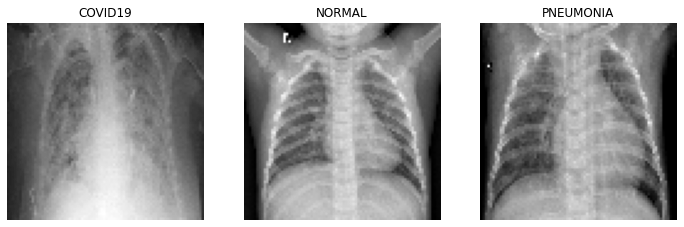

In [ ]:
showSample(trainData)

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
تابع زیر با گرفتن داده ها و عنوان نمودار،نمودار داده ها را رسم می کند و مشخص می کند در کل داده،از هر کلاس چند نمونه داده شده است.
</div>

In [ ]:
def showCountPlot(data,title):
    count_dict = {0:0 , 1:0 , 2:0}
    for label in data.classes:
        count_dict[label] += 1
    x = ['COVID19','NORMAL','PNEUMONIA']
    y = list(count_dict.values())
    plt.title(title)
    plt.bar(x,y)

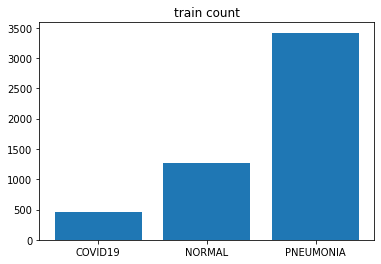

In [ ]:
showCountPlot(trainData,"train count")

# Q3

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
در این قسمت تابعی جهت ایجاد مدل پیاده سازی شده است.این تابع تابع فعال ساز مدل،بهیه ساز و تابع loss را در ورودی دریافت می کند و مطابق با آن مدل را می سازد. از آن جایی که داده های ورودی به صورت عکس های 80*80 و خاکستری است (بعد(1*80*80))برای آموزش مدل ابتدا آن ها را flat کرده و در ادامه داده هایی با بعد 80*80=6400 وارد شبکه می شوند.بنابراین در ابتدای شبکه یک لایه flatten وجود دارد و پس از آن همه لایه ها از نوع denseآمده اند.
    <br/>
    مقادیر پیش فرض برای تابع به صورت زیر است:
    <br/>
    &nbsp;&nbsp;&nbsp;تابع فعال ساز:relu
    <br/>
    &nbsp;&nbsp;&nbsp;بهینه ساز:SGD
    <br/>
    &nbsp;&nbsp;&nbsp;نرخ یادگیری: &nbsp;0.01
    <br/>
    &nbsp;&nbsp;&nbsp;تابع loss: categorical cross entropy
</div>

In [7]:
def createModel(activation = "relu",optimizer = optimizers.SGD(learning_rate=0.01),loss = "categorical_crossentropy"):
    input = layers.Input(shape=(80,80,1))
    out = layers.Flatten()(input)
    out = layers.Dense("4000",activation = activation)(out)
    out = layers.Dense("3000",activation = activation)(out)
    out = layers.Dense("2000",activation = activation)(out)
    out = layers.Dense("4000",activation = activation)(out)
    out = layers.Dense("3",activation = "softmax")(out)
    model = models.Model(inputs = input,outputs = out)
    model.compile(optimizer = optimizer,loss = loss,metrics=['accuracy'])
    return model

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
ساختار مدل در زیر قابل مشاهده است.تعداد پارامتر های هر لایه برابر تعداد وزن ها و بایاس های آن لایه است.هر خروجی لایه ی قبل(که به تعداد نورون های لایه ی قبل است) به تمام نورون های لایه وارد می شود و برای هر کدام از آن ها باید وزن ها مقدار دهی شوند بنابراین تعداد وزن ها در هر لایه برابر حاصل ضرب نورن های لایه ی قبل در نورون های همان لایه است.همچنین به هر نورون لایه یک بایاس نیز وارد می شود بنابراین تعداد بایاس های هر لایه برابر همان تعداد نورون هاست.
باتوجه به صحبت های بالا می توان گفت تعداد پارامتر های هر لایه برابر است با:
    
    
        

</div>

#params = #weights + #bias = # neurons in previous layer * # neurons in current layer + # neurons in current layer

In [ ]:
model = createModel()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 4000)              25604000  
_________________________________________________________________
dense_1 (Dense)              (None, 3000)              12003000  
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dense_3 (Dense)              (None, 4000)              8004000   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12003 

# Q4

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
در بقیه ی قسمت ها جهت ارزیابی مدل از توابع زیر استفاده شده است که به طور مختصر راجع به هر یک توضیح داده شده است. 
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
<b> تابع plotLossAccuracy:</b>
    <br/>
    &nbsp;&nbsp;&nbsp;هنگام آموزش مدل تابع fit علاوه بر مقدار دهی به پارامترها محاسبه میکند که در هر epoch مقدار acuuracy و loss برای داده های آموزش و تست چه قدر بوده است و آن را به حالت یک دیکشنری بر می گرداند.این تابع این دیکشنری را دریافت می کند و به کمک آن نموادر مربوط به accuracy و loss مربوط به داده های آموزش و تست را رسم می کند.
    
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
<b> تابع getShuffleLabels:</b>
    <br/>
    &nbsp;&nbsp;&nbsp;هنگام لود داده ها، داده ها شافل می شوند و ترتیب داده ها دیگر همانند ترتیب قرار گرفته در دایرکتوری نیست به همین جهت برای مقایسه ی نتایج مدل با نتایج واقعی لازم است که خروجی واقعی به همان ترتیب داده های شافل شده باشند.این تابع با حرکت کردن بر روی داده های شافل شده خروجی های واقعی را به ترتیب شافل بر میگرداند.
    
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
<b> تابع  evaluateModel:</b>
    <br/>
    &nbsp;&nbsp;&nbsp;این تابع در ابتدا به کمک تابع بالا خروجی های واقعی را به دست می آورد.سپس به کمک تابع predict کلاس داده های داده شده را به دست می آورد. در انتها نیز به کمک classification_report در کلاس sklearn معیار های recall،precision،F1 و acuuracy را گزارش می کند.
    
</div>

In [8]:
def plotLossAccuracy(history):
    epoch_num = len(history.history['accuracy'])
    fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)
    fig.subplots_adjust(wspace=0.3)
    axes[0][0].plot(list(range(1,epoch_num+1)),history.history['accuracy'], label='Train')
    axes[0][0].plot(list(range(1,epoch_num+1)), history.history['val_accuracy'], label='Test')
    axes[0][0].set_ylabel('Accuracy')
    axes[0][0].set_xlabel('Epoch')
    axes[0][0].set_title('network accuracy')
    axes[0][0].legend()

    axes[0][1].plot(list(range(1,epoch_num+1)),history.history['loss'], label='Train')
    axes[0][1].plot(list(range(1,epoch_num+1)),history.history['val_loss'], label='Test')
    axes[0][1].set_ylabel('Loss')
    axes[0][1].set_xlabel('Epoch')
    axes[0][1].set_title('network Loss')
    axes[0][1].legend()

In [9]:
def getShuffleLabels(data):
    labels = []
    if(len(data.classes)%data.batch_size == 0):
        add = 0
    else:
        add = 1
    batche_num = (len(data.classes)//(data.batch_size))+add
    for batch in range(batche_num):
        batch_img,batch_label = data.next()
        for label in batch_label:
            labels.append(np.argmax(label))
    return np.array(labels)



In [10]:
def evaluateModel(model,data):
    y_true = getShuffleLabels(data)
    y_pred = model.predict(data)
    y_pred = np.argmax(y_pred,axis = 1)
    print(classification_report(y_true,y_pred))

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
بدون نرمال کردن داده ها و با قرار دادن ضریب اسکیل برابر یک، مدل را آموزش داده و نتایج را برای دو تابع فعال ساز relu و tanh مشاهده می شود.
    
</div>

In [10]:
trainData = dataLoader('/content/Data/train',1,32)
testData = dataLoader('/content/Data/test',1,32)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.





### relu






In [11]:
relu_model = createModel("relu")
relu_history = relu_model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 144s 886ms/step - loss: nan - accuracy: 0.1226 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 143s 888ms/step - loss: nan - accuracy: 0.0846 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 143s 889ms/step - loss: nan - accuracy: 0.0949 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 143s 887ms/step - loss: nan - accuracy: 0.0917 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 143s 890ms/step - loss: nan - accuracy: 0.0921 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 142s 886ms/step - loss: nan - accuracy: 0.0810 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 143s 887ms/step - loss: nan - accuracy: 0.0865 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [



*   train results






In [13]:
evaluateModel(relu_model,trainData)

              precision    recall  f1-score   support

           0       0.09      1.00      0.16       460
           1       0.00      0.00      0.00      1266
           2       0.00      0.00      0.00      3418

    accuracy                           0.09      5144
   macro avg       0.03      0.33      0.05      5144
weighted avg       0.01      0.09      0.01      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



*   test results




In [14]:
evaluateModel(relu_model,testData)

              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))






*   plot








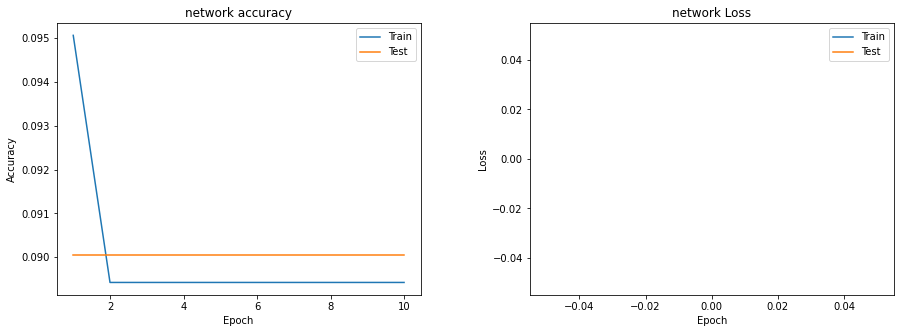

In [15]:
plotLossAccuracy(relu_history)



### tanh



In [ ]:
tanh_model = createModel(activation = "tanh")
tanh_history = tanh_model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 148s 921ms/step - loss: 2.1841 - accuracy: 0.5554 - val_loss: 0.8366 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 147s 912ms/step - loss: 0.8631 - accuracy: 0.6636 - val_loss: 0.8331 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 146s 909ms/step - loss: 0.8381 - accuracy: 0.6642 - val_loss: 0.8243 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 147s 912ms/step - loss: 0.8247 - accuracy: 0.6709 - val_loss: 0.8390 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 147s 914ms/step - loss: 0.8359 - accuracy: 0.6675 - val_loss: 0.8370 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 147s 917ms/step - loss: 0.8295 - accuracy: 0.6674 - val_loss: 0.8366 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 146s 909ms/step - loss: 0.8289 - accuracy: 0.6656 - val_loss: 0.8321 -



*   train resluts




In [ ]:
evaluateModel(tanh_model,trainData)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   test results




In [ ]:
evaluateModel(tanh_model,testData)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   plot



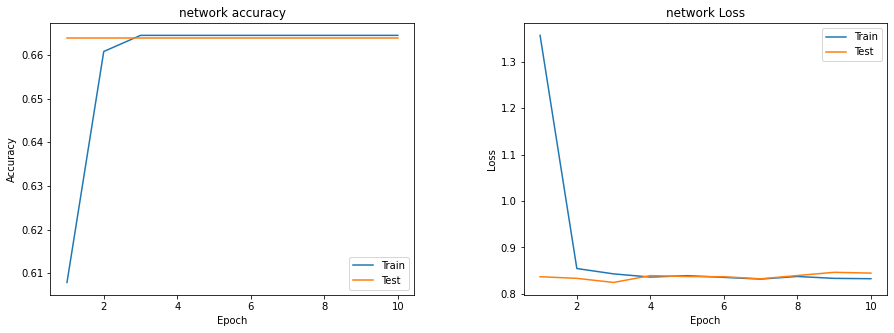

In [ ]:
plotLossAccuracy(tanh_history)

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
تابع  relu به این صورت کار می کند که به ازای داده های مثبت خود داده را به عنوان خروجی بر میگرداند از آن جایی که در این قسمت داد ها نرمال نشده اند رنج داده ها زیاد است و ضرب مقادیر بزرگ در هم باعث ایجاد مقادیر بزرگی می شود.همچنین در لای آخر نیز sotmax همه ی این اعداد را به توان e می رساند که در نهایت عدد بسیاربزرگی است به همین جهت در حین این مراحل اورفلو اتفاق می افتد و در پایان loss محاسبه برای ایت تابع فعال ساز به nan می رسد.
    <br/>
    از طرفی همه مقادیر خروجی در تابع tanh بین صفر و یک قرار میگیرند.به همین جهت در این تابع فعالساز مشکل nan شدن loss دیده نمی شود. اما نمودار tanh نشان می دهد که این تابع در دو انتها دارای شیب بسیار کمی است و درنتیجه در فرآیند back propagation وزن ها بسیار کم آپدیت می شوند و فرآیند آموزش به شدت کند انجام می شود.
    <br/>
     ازنتایج می توان به این نتیجه رسید که فرآیند یادگیری برای هر دو مدل بسیار کند بوده و تقریبا از epoch اول به بعد تغیرات بسیار کوچکی دیده می شود.
    <br/>
    اگر در تابع relu داده های کوچکی بدهیم دیگر به مشکل گفته شده بر نمی خوریم.بنابراین با نرمال سازی داده ها و تقسیم آن ها به رنج داده ها می توان اعداد کوچکی به دست آورد.مشکل تابع tanh هم این است که به ازای ورودی های خیلی بزرگ شیب داده تقریبا برابر 0 می شود و دیگر عمل آپدیت شدن انجام نمی شود پس در این قسمت نیز اگر داده را نرمال کنیم داده ها در بازه ی کوچکی قرار می گیرند که شیب در آن نزدیک به صفر نیست و وزن ها آپدیت می شوند.
    
</div>

# Q5

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
طبق توضیحات بالا لازم است داده ها نرمال شوند تا جواب خوبی از شبکه بگیریم.بنابراین در این قسمت در ابتدا دوباره داده ها نرمال شده و شبکه به کمک توابع فعال ساز relu وtanh آموزش داده می شود. 
</div>

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
 جهت انتخاب معماری خوب تعدادی قواعد وجود دارد که می تواند کمک کننده باشد:
    <li>تعداد نورون های لایه های پنهان بهتر است بین سایز ورودی و سایز خروجی باشد.</li>
    <li>تعداد نورون های لایه های پنهان بهتر است برابر با دو سوم سایز ورودی به علاوه سایز خروجی باشد.</li>
    <li>تعداد نورون های لایه های پنهان بهتر است از دو برابر سایز ورودی کوچک تر باشد.</li>
    با رعایت  تقریبی قانون سوم نتایج خوبی به دست آمد(در واقع لایه ها در ابتدا نزولی هستند و سپس یک لایه با تعداد نرون های بیشتر قرار داده شد چرا که در این روش دقت بهتری به دست آمد) و در نهایت مدل نهایی درون تابع createModel که شکل آن در قسمت  سوم نشان داده شده بود زده شد.همچنین برای اینکه مدل خیلی پیچیده نباشد لایه های بیشتری به آن اضافه نشد.(با اضافه شدن لایه های بیشتر تغییر زیادی در مدل دیده نمی شد)
    <br/>
    مشاهده می شود که در این حالت عملکرد هر دو تابع در شبکه ی عصبی بسیار بهتر شده است.
</div>

In [11]:
trainData = dataLoader('/content/Data/train',1/255,32)
testData = dataLoader('/content/Data/test',1/255,32)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.




### relu



In [ ]:
nrelu_model = createModel(activation="relu")
nrelu_history = nrelu_model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 144s 895ms/step - loss: 0.6537 - accuracy: 0.7250 - val_loss: 0.3091 - val_accuracy: 0.9092
Epoch 2/10
161/161 [==============================] - 144s 897ms/step - loss: 0.4014 - accuracy: 0.8444 - val_loss: 0.3160 - val_accuracy: 0.8711
Epoch 3/10
161/161 [==============================] - 145s 902ms/step - loss: 0.3913 - accuracy: 0.8472 - val_loss: 0.2343 - val_accuracy: 0.9177
Epoch 4/10
161/161 [==============================] - 146s 910ms/step - loss: 0.3030 - accuracy: 0.8847 - val_loss: 0.1895 - val_accuracy: 0.9317
Epoch 5/10
161/161 [==============================] - 143s 891ms/step - loss: 0.2973 - accuracy: 0.8872 - val_loss: 0.1886 - val_accuracy: 0.9317
Epoch 6/10
161/161 [==============================] - 143s 890ms/step - loss: 0.2430 - accuracy: 0.9084 - val_loss: 0.1797 - val_accuracy: 0.9356
Epoch 7/10
161/161 [==============================] - 144s 896ms/step - loss: 0.2280 - accuracy: 0.9090 - val_loss: 0.1780 -





*   train results






In [ ]:
evaluateModel(nrelu_model,trainData)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       460
           1       0.92      0.84      0.88      1266
           2       0.93      0.98      0.95      3418

    accuracy                           0.93      5144
   macro avg       0.94      0.89      0.91      5144
weighted avg       0.93      0.93      0.93      5144





*   test results




In [ ]:
evaluateModel(nrelu_model,testData)

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       116
           1       0.91      0.88      0.89       317
           2       0.94      0.98      0.96       855

    accuracy                           0.94      1288
   macro avg       0.95      0.88      0.91      1288
weighted avg       0.94      0.94      0.94      1288





*   plot




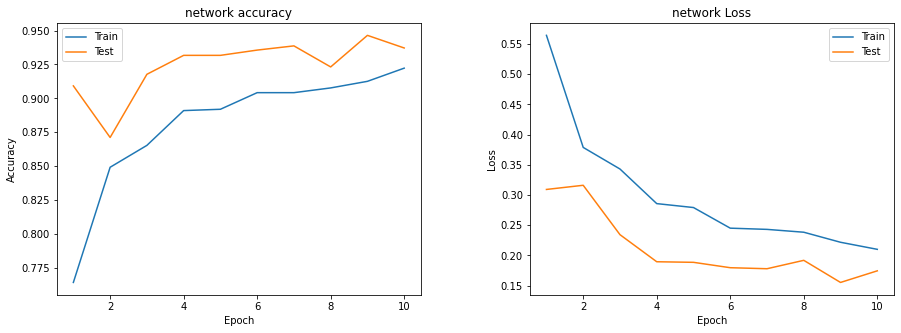

In [ ]:
plotLossAccuracy(nrelu_history)



### tanh



In [ ]:
ntanh_model = createModel(activation="tanh")
ntanh_history = ntanh_model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 144s 890ms/step - loss: 1.1166 - accuracy: 0.6757 - val_loss: 0.3291 - val_accuracy: 0.8595
Epoch 2/10
161/161 [==============================] - 142s 885ms/step - loss: 0.3804 - accuracy: 0.8522 - val_loss: 0.2096 - val_accuracy: 0.9231
Epoch 3/10
161/161 [==============================] - 143s 887ms/step - loss: 0.2933 - accuracy: 0.8917 - val_loss: 0.1910 - val_accuracy: 0.9317
Epoch 4/10
161/161 [==============================] - 142s 885ms/step - loss: 0.2731 - accuracy: 0.8992 - val_loss: 0.1795 - val_accuracy: 0.9379
Epoch 5/10
161/161 [==============================] - 143s 887ms/step - loss: 0.2645 - accuracy: 0.8987 - val_loss: 0.2061 - val_accuracy: 0.9193
Epoch 6/10
161/161 [==============================] - 142s 886ms/step - loss: 0.2611 - accuracy: 0.8925 - val_loss: 0.2307 - val_accuracy: 0.9107
Epoch 7/10
161/161 [==============================] - 142s 885ms/step - loss: 0.2609 - accuracy: 0.9017 - val_loss: 0.1966 -



*   train results




In [ ]:
evaluateModel(ntanh_model,trainData)

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       460
           1       0.82      0.91      0.86      1266
           2       0.97      0.88      0.92      3418

    accuracy                           0.89      5144
   macro avg       0.83      0.92      0.87      5144
weighted avg       0.91      0.89      0.90      5144





*   test results




In [ ]:
evaluateModel(ntanh_model,testData)

              precision    recall  f1-score   support

           0       0.65      0.97      0.78       116
           1       0.83      0.93      0.88       317
           2       0.97      0.86      0.92       855

    accuracy                           0.89      1288
   macro avg       0.82      0.92      0.86      1288
weighted avg       0.91      0.89      0.89      1288





*   plot




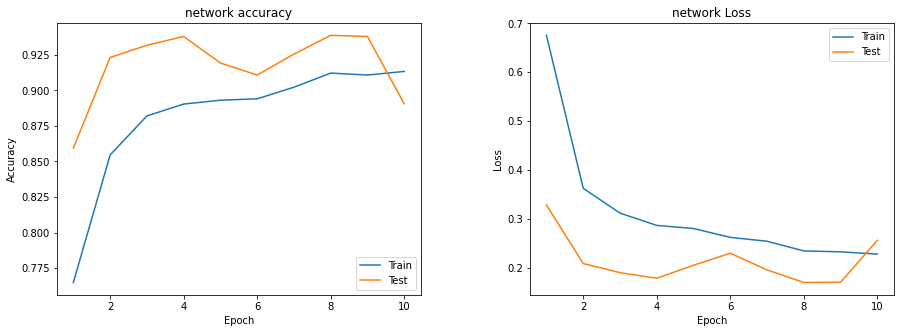

In [ ]:
plotLossAccuracy(ntanh_history)

# Q6

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
در این قسمت در ابتدا تاثیر momentum مورد بررسی قرار گرفته است و سپس نوع بهینه ساز از SGD(با نرخ یادگیری 0.01)به Adam(با نرخ یادگیری 0.001)  تغییر پیدا کرده است. 
</div>



### momentum



<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
    اضافه کردن momentum به مدل باعث می شود تا به هنگام آپدیت کردن وزن یک لایه فقط به گرادیان در آن زمان توجه نشود بلکه مطابق فرمول زیر و به صورت بازگشتی گرادیان در زمان های قبلی نیز در محاسبه ی تغییرات اثر دارد.

    
</div>

 <img src="img/1.png" style="float:left;width:30%;padding-top: 10px" />

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
    در واقع این موضوع به مدل اجازه می دهد تا علاوه بر تصمیم گیری بر اساس داده های کنونی از اطلاعاتی  که در batch های قبلی وجود داشتند نیز استفاده کند.همچنین تاثیر داده های نویزی موجود در یک batch را کمتر می شود. اضافه شدن ضریب به مدل اجازه می دهد که با گیر افتادن در یک local minima توانایی خروج از آن را داشته باشد و  در صورتی که این ضریب مناسب باشد با گام های بهتری به نقطه ی بهینه میرسیم و مدل زود تر به دقت مطلوب می رسد.اما در صورتی که ضریب بسیار بزرگ باشد تاثیر گرادیان در آخرین مرحله به شدت کم می شود و ممکن است مدل به سمت اشتباهی حرکت کند مثلا از gloabal minimum عبور کند یا در داخل local minima گیر بیوفتد.همان طور که از تست ها مشخص است اگر ضریب 0.5 از همه بهتر عمل کرده است اما با زیاد کردن (0.9 یا 0.99) دقت کاهش یافته و در 0.99 مدل به نتایج خوبی دست نیافته است.  
 <img src="img/2.png" style="align:center;width:50%;padding-top: 10px" />
    
</div>



1.   0.5






In [ ]:
model = createModel(activation="relu",optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.5))
history = model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 144s 893ms/step - loss: 0.6033 - accuracy: 0.7346 - val_loss: 0.2904 - val_accuracy: 0.8960
Epoch 2/10
161/161 [==============================] - 143s 887ms/step - loss: 0.3342 - accuracy: 0.8675 - val_loss: 0.1992 - val_accuracy: 0.9309
Epoch 3/10
161/161 [==============================] - 142s 884ms/step - loss: 0.2724 - accuracy: 0.9030 - val_loss: 0.1852 - val_accuracy: 0.9410
Epoch 4/10
161/161 [==============================] - 143s 888ms/step - loss: 0.2456 - accuracy: 0.9051 - val_loss: 0.1725 - val_accuracy: 0.9402
Epoch 5/10
161/161 [==============================] - 143s 887ms/step - loss: 0.2532 - accuracy: 0.8998 - val_loss: 0.2137 - val_accuracy: 0.9193
Epoch 6/10
161/161 [==============================] - 143s 885ms/step - loss: 0.2143 - accuracy: 0.9233 - val_loss: 0.2198 - val_accuracy: 0.9293
Epoch 7/10
161/161 [==============================] - 142s 887ms/step - loss: 0.2148 - accuracy: 0.9149 - val_loss: 0.2138 -



*  train results




In [ ]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       460
           1       0.92      0.89      0.91      1266
           2       0.96      0.97      0.96      3418

    accuracy                           0.95      5144
   macro avg       0.94      0.93      0.94      5144
weighted avg       0.95      0.95      0.95      5144





*   test results




In [ ]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       116
           1       0.92      0.91      0.92       317
           2       0.96      0.97      0.96       855

    accuracy                           0.95      1288
   macro avg       0.95      0.93      0.94      1288
weighted avg       0.95      0.95      0.95      1288





*   plot




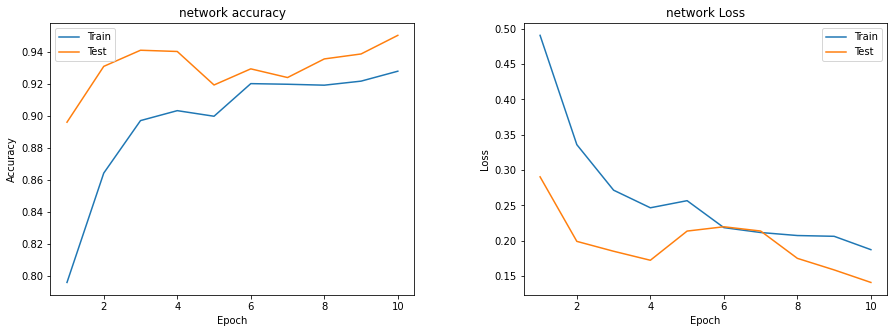

In [ ]:
plotLossAccuracy(history)




2.   0.9



In [ ]:
model = createModel(activation="relu",optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.9))
history = model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 173s 1s/step - loss: 0.6640 - accuracy: 0.7137 - val_loss: 0.2347 - val_accuracy: 0.9239
Epoch 2/10
161/161 [==============================] - 170s 1s/step - loss: 0.3825 - accuracy: 0.8458 - val_loss: 0.2477 - val_accuracy: 0.9014
Epoch 3/10
161/161 [==============================] - 170s 1s/step - loss: 0.2778 - accuracy: 0.8964 - val_loss: 0.2810 - val_accuracy: 0.9030
Epoch 4/10
161/161 [==============================] - 169s 1s/step - loss: 0.2808 - accuracy: 0.8989 - val_loss: 0.1807 - val_accuracy: 0.9387
Epoch 5/10
161/161 [==============================] - 169s 1s/step - loss: 0.2602 - accuracy: 0.8925 - val_loss: 0.2338 - val_accuracy: 0.9045
Epoch 6/10
161/161 [==============================] - 170s 1s/step - loss: 0.2510 - accuracy: 0.9038 - val_loss: 0.1987 - val_accuracy: 0.9177
Epoch 7/10
161/161 [==============================] - 170s 1s/step - loss: 0.2426 - accuracy: 0.9092 - val_loss: 0.1758 - val_accuracy: 0.9464



*   train results




In [ ]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       460
           1       0.97      0.72      0.83      1266
           2       0.91      0.97      0.94      3418

    accuracy                           0.91      5144
   macro avg       0.89      0.88      0.87      5144
weighted avg       0.91      0.91      0.90      5144





*   test results




In [ ]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       116
           1       0.96      0.77      0.86       317
           2       0.92      0.97      0.94       855

    accuracy                           0.92      1288
   macro avg       0.90      0.90      0.90      1288
weighted avg       0.92      0.92      0.92      1288





*   plot




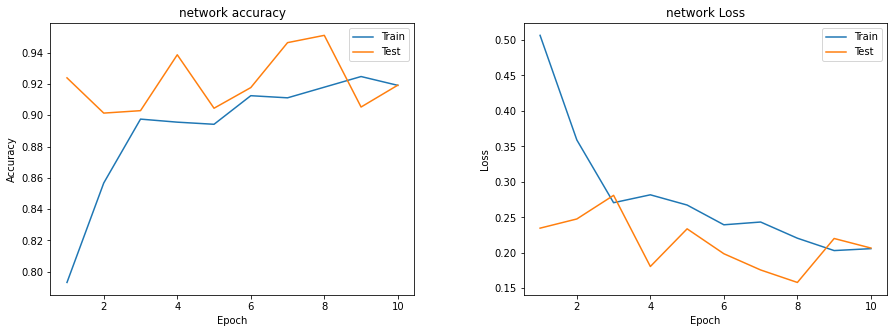

In [ ]:
plotLossAccuracy(history)




3.   0.99



In [ ]:
model = createModel(activation="relu",optimizer= optimizers.SGD(learning_rate=0.01, momentum=0.99))
history = model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 173s 1s/step - loss: 0.7423 - accuracy: 0.6767 - val_loss: 0.2688 - val_accuracy: 0.9193
Epoch 2/10
161/161 [==============================] - 170s 1s/step - loss: 0.4237 - accuracy: 0.8423 - val_loss: 0.5103 - val_accuracy: 0.7842
Epoch 3/10
161/161 [==============================] - 172s 1s/step - loss: 0.3797 - accuracy: 0.8649 - val_loss: 0.3038 - val_accuracy: 0.8835
Epoch 4/10
161/161 [==============================] - 171s 1s/step - loss: 0.3562 - accuracy: 0.8735 - val_loss: 0.2248 - val_accuracy: 0.9286
Epoch 5/10
161/161 [==============================] - 171s 1s/step - loss: 0.3313 - accuracy: 0.8897 - val_loss: 0.2719 - val_accuracy: 0.9169
Epoch 6/10
161/161 [==============================] - 171s 1s/step - loss: 0.4156 - accuracy: 0.8564 - val_loss: 0.5668 - val_accuracy: 0.8354
Epoch 7/10
161/161 [==============================] - 170s 1s/step - loss: 0.5597 - accuracy: 0.7703 - val_loss: 0.7147 - val_accuracy: 0.8828



*   train results




In [ ]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       460
           1       0.00      0.00      0.00      1266
           2       0.72      1.00      0.83      3418

    accuracy                           0.73      5144
   macro avg       0.55      0.59      0.56      5144
weighted avg       0.56      0.73      0.63      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   test results




In [ ]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       116
           1       0.00      0.00      0.00       317
           2       0.71      1.00      0.83       855

    accuracy                           0.73      1288
   macro avg       0.55      0.59      0.56      1288
weighted avg       0.56      0.73      0.63      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   plot




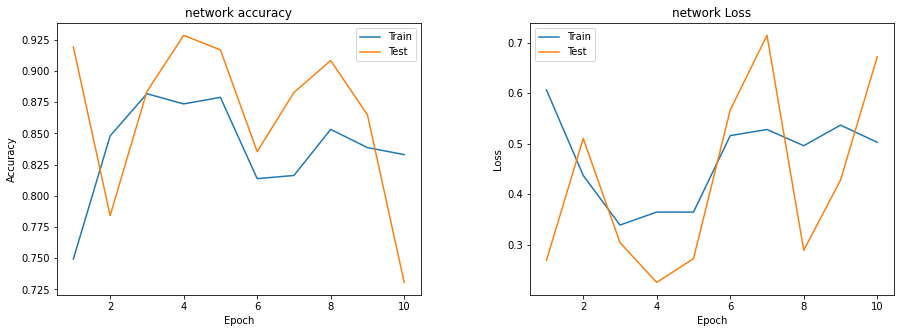

In [ ]:
plotLossAccuracy(history)



### Adam optimizer



<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
بهینه ساز adam جهت آپدیت کردن وزن ها از ترکیب دو روش زیر استفاده می کند:
    <li>
    Adaptive Gradiant Algirithm که در آن نرخ یادگیری برای هر پارامتر(وزن ویایاس) متفاوت است و یک نرخ برای تمام پارامترها استفاده نمی شود.
    </li>
    <li>
    Root Mean Square Propagation که در آن نرخ یادگیری هر پارامتر بر اساس میانگین گرادیان وزن هاست.
    </li>
     در واقع در این بهینه ساز سعی می شود تا به هنگام رسیدن به local minima مدل با برداشتن گامی بزرگتر از آن خارج شود و به هنگام رسیدن به global minimum در اطراف آن نوسان کند تا درنهایت نقطه ی بهینه را پیدا کند.
</div>

In [ ]:
model = createModel(activation="relu",optimizer= optimizers.Adam(learning_rate=0.001))
history = model.fit(trainData,validation_data = testData,epochs = 10)

Epoch 1/10
161/161 [==============================] - 146s 907ms/step - loss: 3.2004 - accuracy: 0.6765 - val_loss: 0.3533 - val_accuracy: 0.8797
Epoch 2/10
161/161 [==============================] - 144s 897ms/step - loss: 0.3702 - accuracy: 0.8717 - val_loss: 0.2442 - val_accuracy: 0.9270
Epoch 3/10
161/161 [==============================] - 147s 913ms/step - loss: 0.3020 - accuracy: 0.8868 - val_loss: 0.2178 - val_accuracy: 0.9193
Epoch 4/10
161/161 [==============================] - 145s 900ms/step - loss: 0.2821 - accuracy: 0.8995 - val_loss: 0.1815 - val_accuracy: 0.9317
Epoch 5/10
161/161 [==============================] - 144s 898ms/step - loss: 0.2798 - accuracy: 0.9068 - val_loss: 0.1868 - val_accuracy: 0.9340
Epoch 6/10
161/161 [==============================] - 144s 895ms/step - loss: 0.2551 - accuracy: 0.9066 - val_loss: 0.1943 - val_accuracy: 0.9356
Epoch 7/10
161/161 [==============================] - 144s 895ms/step - loss: 0.2466 - accuracy: 0.9145 - val_loss: 0.2681 -



*   train results




In [ ]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       460
           1       0.89      0.90      0.90      1266
           2       0.96      0.95      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.92      0.92      0.92      5144
weighted avg       0.94      0.94      0.94      5144





*   test results




In [ ]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       116
           1       0.90      0.92      0.91       317
           2       0.97      0.96      0.96       855

    accuracy                           0.95      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.95      0.95      0.95      1288





*   plot




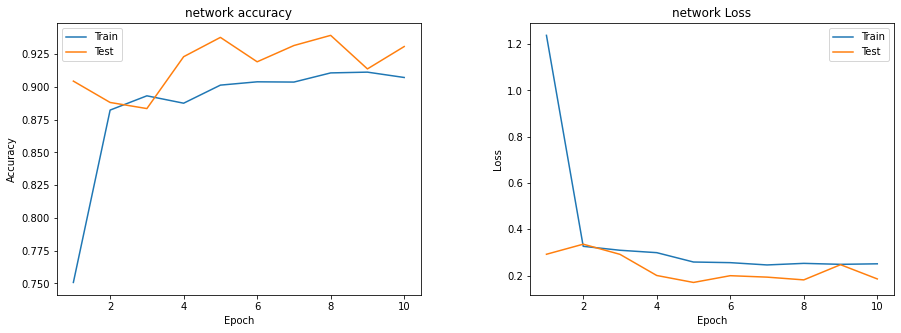

In [ ]:
plotLossAccuracy(history)

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
اگر نتایج این قسمت را با SGD مقایسه کنیم مشاهده می کنیم که مقدار بسیار کمی Adam به دقت بهتری رسیده است.
</div>

# Q7

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
در این قسمت تعداد epoch ها از 10 به 20 تغییر داده شد و نتایج آن به دست آمدند.
    <br/>
معمولا شبکه های عصبی برای چند epoch آموزش داده می شوند.علت این امر این است که در هر epoch به تعداد batch ها iteration انجام می شود و به کمک back propagation وزن ها آپدیت می شوند تا در نهایت به global optima نزدیک تر شویم. اما ممکن است همچنان بعد از انجام این عمل وزن ها به حد کافی به gobal optima نزدیک نشده باشند و بهترین وزن ها را نداشته باشیم پس بار دیگر با شروع از وزن های جدید تلاش می شود که نقطه بهینه برسیم اما این کار را تا جایی ادامه می دهیم که مدل دچار overfit نشود یعنی نباید به جایی برسیم که دقت روی داده های تست تغییری نکند اما همچنان بر روی داده های آموزش بالا برود زیرا در این صورت مدل حتی سعی می کند که نویز های موجود در داده های آموزشی را نیز شبیه سازی کند و فقط بر روی تعدادی داده ی خاص جواب دهد.

</div>

In [ ]:
model = createModel(activation="relu",optimizer= optimizers.Adam(learning_rate=0.001))
history = model.fit(trainData,validation_data = testData,epochs = 20)

Epoch 1/20
161/161 [==============================] - 173s 1s/step - loss: 5.2316 - accuracy: 0.6321 - val_loss: 0.4134 - val_accuracy: 0.8494
Epoch 2/20
161/161 [==============================] - 172s 1s/step - loss: 0.3582 - accuracy: 0.8678 - val_loss: 0.2182 - val_accuracy: 0.9224
Epoch 3/20
161/161 [==============================] - 172s 1s/step - loss: 0.3227 - accuracy: 0.8871 - val_loss: 0.2104 - val_accuracy: 0.9239
Epoch 4/20
161/161 [==============================] - 172s 1s/step - loss: 0.2746 - accuracy: 0.9030 - val_loss: 0.2133 - val_accuracy: 0.9154
Epoch 5/20
161/161 [==============================] - 172s 1s/step - loss: 0.2695 - accuracy: 0.9016 - val_loss: 0.1673 - val_accuracy: 0.9402
Epoch 6/20
161/161 [==============================] - 173s 1s/step - loss: 0.2575 - accuracy: 0.9120 - val_loss: 0.1844 - val_accuracy: 0.9348
Epoch 7/20
161/161 [==============================] - 173s 1s/step - loss: 0.2246 - accuracy: 0.9189 - val_loss: 0.1869 - val_accuracy: 0.9255



*   train results




In [ ]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       460
           1       0.91      0.93      0.92      1266
           2       0.97      0.96      0.97      3418

    accuracy                           0.95      5144
   macro avg       0.93      0.94      0.94      5144
weighted avg       0.95      0.95      0.95      5144





*   test results




In [ ]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       116
           1       0.89      0.94      0.92       317
           2       0.97      0.95      0.96       855

    accuracy                           0.94      1288
   macro avg       0.91      0.93      0.92      1288
weighted avg       0.95      0.94      0.94      1288





*   plot




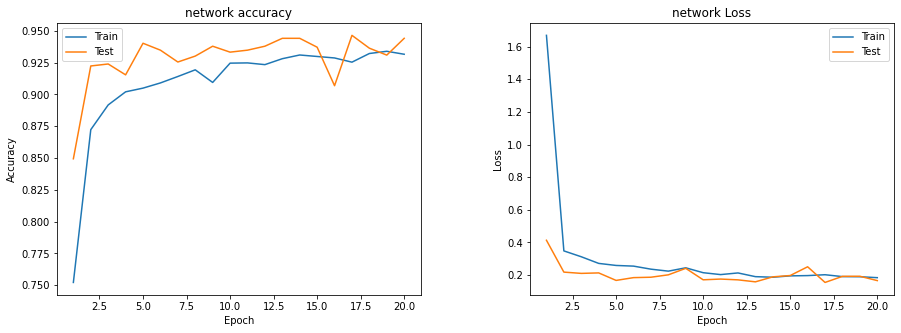

In [ ]:
plotLossAccuracy(history)

# Q8

<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
  درادامه تابع mse به عنوان loss function به مدل داده شد و مشاهده شد که این تابع بر روی داده به خوبی عمل نمی کند چرا که در این مدل لیبل ها پیوسته نیستند ولی این تابع جهت محاسبه ی خطا به تفاوت فاصله ی جواب ها از مقدار واقعی می پردازد و مقدار لاس را در صورتی خوب می داند مجموع این فاصله ها کمینه باشد.در حالی که چیزی که در این جا برای مهم است این که احتمال محاسبه شده برای جواب اصلی توسط مدل ما بیشینه باشد و توجهی به مجموع نمی شود.
    <br/>
    برای مثال فرض کنید داده ای داریم که پاسخ های آن در 6 کلاس باشند و بدانیم که برای یک نمونه، جواب های واقعی برابر [1,0,0,0,0,0] هستند.
    <br/>
    احتمال های تولید شده برای این نمونه توسط مدل یک برابر[0.2,0.16, 0.16, 0.16, 0.16, 0.16] و توسط مدل دو برابر [0.4,0.5,0.1,0,0,0] است.تابع mse برای مدل یک مقدار 0.128 و برای مدل دو مقدار 0.1033 را می دهد.اما می توان دید که مدل یک در این جا بهتر عمل کرده است.از این تابع معمولا دو مواردی استفاده میشود که لیبل های داده به صورت پیوسته باشند تا گرفتن این اختلاف معنا دار باشد.
</div>

In [ ]:
model = createModel(activation="relu",optimizer= optimizers.Adam(learning_rate=0.001),loss='MSE')
history = model.fit(trainData,validation_data = testData,epochs = 20)

Epoch 1/20
161/161 [==============================] - 174s 1s/step - loss: 0.2203 - accuracy: 0.6631 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 172s 1s/step - loss: 0.2258 - accuracy: 0.6613 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 173s 1s/step - loss: 0.2211 - accuracy: 0.6683 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 172s 1s/step - loss: 0.2184 - accuracy: 0.6723 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 171s 1s/step - loss: 0.2283 - accuracy: 0.6576 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 171s 1s/step - loss: 0.2188 - accuracy: 0.6718 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 172s 1s/step - loss: 0.2206 - accuracy: 0.6690 - val_loss: 0.2241 - val_accuracy: 0.6638



*   train results




In [ ]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   test results




In [ ]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




*   plot




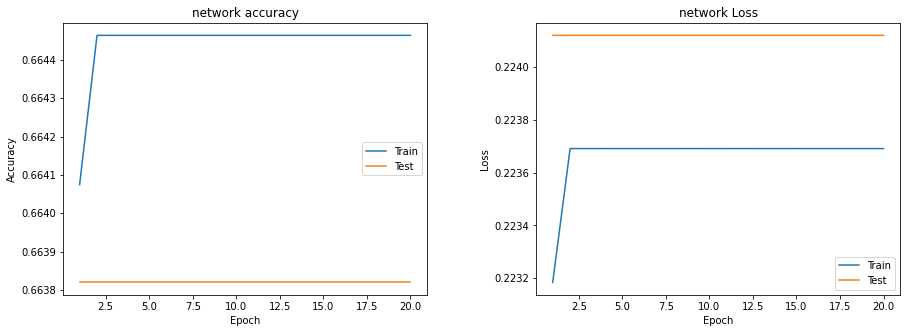

In [ ]:
plotLossAccuracy(history)

# Q9



### regularization



<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
روش های regularization روش هایی هستند که کمک می کنند تا overfitting کاهش پیدا کند.در بیشتر این روش ها به تابع loss یک پنالتی اضافه می کنند که معمولا نسبتی از وزن هاست.در واقع در این روش سعی می شود تا وزن ها به مقدار کافی کوچک بمانند. برای مثال L2 regularization ،نصف ضریب مربوطه را در مجموع توان دو وزن ها ضرب می کند و آن را به loss اضافه می کند.اصافه شدن loss باعث می شود مقدار آپدیت شده برای وزن ها کوچک تر شود.
</div>

In [20]:
activation = "relu"
optimizer = optimizers.Adam(learning_rate=0.001)
regulizer = regularizers.l2(0.0001)
loss = "categorical_crossentropy"
input = layers.Input(shape=(80,80,1))
out = layers.Flatten()(input)
out = layers.Dense("4000",activation = activation,kernel_regularizer= regulizer)(out)
out = layers.Dense("3000",activation = activation,kernel_regularizer= regulizer)(out)
out = layers.Dense("2000",activation = activation,kernel_regularizer= regulizer)(out)
out = layers.Dense("4000",activation = activation,kernel_regularizer= regulizer)(out)
out = layers.Dense("3",activation = "softmax")(out)
model = models.Model(inputs = input,outputs = out)
model.compile(optimizer = optimizer,loss = loss,metrics=['accuracy'])

In [21]:
history = model.fit(trainData,validation_data = testData,epochs = 20)

Epoch 1/20
161/161 [==============================] - 144s 890ms/step - loss: 3.4988 - accuracy: 0.6585 - val_loss: 0.8493 - val_accuracy: 0.9115
Epoch 2/20
161/161 [==============================] - 143s 887ms/step - loss: 0.8767 - accuracy: 0.8766 - val_loss: 0.8141 - val_accuracy: 0.8587
Epoch 3/20
161/161 [==============================] - 143s 887ms/step - loss: 0.7323 - accuracy: 0.8912 - val_loss: 0.5878 - val_accuracy: 0.9193
Epoch 4/20
161/161 [==============================] - 143s 887ms/step - loss: 0.6458 - accuracy: 0.8880 - val_loss: 0.6018 - val_accuracy: 0.8719
Epoch 5/20
161/161 [==============================] - 143s 889ms/step - loss: 0.5791 - accuracy: 0.8992 - val_loss: 0.4387 - val_accuracy: 0.9387
Epoch 6/20
161/161 [==============================] - 143s 887ms/step - loss: 0.5252 - accuracy: 0.8934 - val_loss: 0.4162 - val_accuracy: 0.9286
Epoch 7/20
161/161 [==============================] - 143s 886ms/step - loss: 0.4831 - accuracy: 0.8990 - val_loss: 0.4147 -



*   train results




In [22]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       460
           1       0.98      0.74      0.84      1266
           2       0.91      0.98      0.95      3418

    accuracy                           0.92      5144
   macro avg       0.92      0.89      0.90      5144
weighted avg       0.93      0.92      0.92      5144





*   test results




In [23]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       116
           1       0.96      0.76      0.85       317
           2       0.92      0.98      0.94       855

    accuracy                           0.92      1288
   macro avg       0.92      0.90      0.91      1288
weighted avg       0.93      0.92      0.92      1288



<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
نتایج نشان می دهند که با استفاده از این روش چهار معیار مورد بررسی(precision,recall,accuracy,F1)  برای داده های تست و آموزش خیلی نزدیک هستند و مدل تقریبا با همان دقتی که به داده های آموزش جواب داده،به داده های تست نیز جواب داده است.
</div>



*   plot




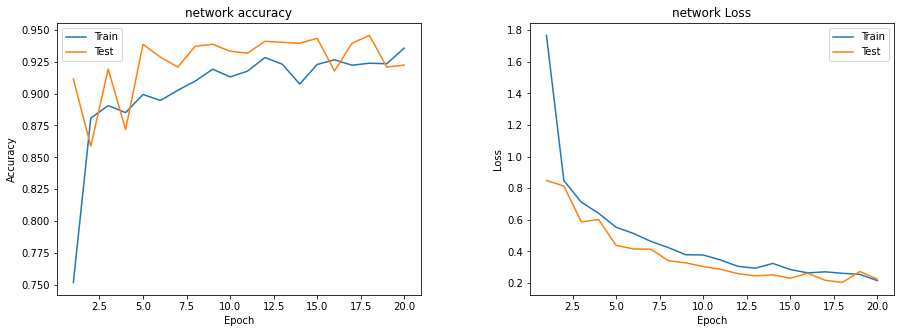

In [24]:
plotLossAccuracy(history)



### dropout



<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
    در این روش با فرکانسی ارتباط میان برخی نورون های دولایه از بین می رود.در این روش سعی می شود با حذف این ارتباطات،مدل توسط ساختار های مختلف آموزش ببیند که باعث می شود overfitting اتفاق نیوفتد.
</div>

In [13]:
activation = "relu"
optimizer = optimizers.Adam(learning_rate=0.001)
loss = "categorical_crossentropy"
input = layers.Input(shape=(80,80,1))
out = layers.Flatten()(input)
out = layers.Dense("4000",activation = activation)(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense("3000",activation = activation)(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense("2000",activation = activation)(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense("4000",activation = activation)(out)
out = layers.Dropout(0.1)(out)
out = layers.Dense("3",activation = "softmax")(out)
model = models.Model(inputs = input,outputs = out)
model.compile(optimizer = optimizer,loss = loss,metrics=['accuracy'])

In [14]:
history = model.fit(trainData,validation_data = testData,epochs = 20)

Epoch 1/20
161/161 [==============================] - 160s 984ms/step - loss: 2.5594 - accuracy: 0.6433 - val_loss: 0.3086 - val_accuracy: 0.8866
Epoch 2/20
161/161 [==============================] - 148s 920ms/step - loss: 0.3833 - accuracy: 0.8614 - val_loss: 0.2187 - val_accuracy: 0.9247
Epoch 3/20
161/161 [==============================] - 149s 927ms/step - loss: 0.3128 - accuracy: 0.8837 - val_loss: 0.1983 - val_accuracy: 0.9332
Epoch 4/20
161/161 [==============================] - 151s 936ms/step - loss: 0.2996 - accuracy: 0.8865 - val_loss: 0.2388 - val_accuracy: 0.9115
Epoch 5/20
161/161 [==============================] - 147s 913ms/step - loss: 0.2895 - accuracy: 0.8902 - val_loss: 0.2184 - val_accuracy: 0.9239
Epoch 6/20
161/161 [==============================] - 145s 900ms/step - loss: 0.2857 - accuracy: 0.8967 - val_loss: 0.1997 - val_accuracy: 0.9387
Epoch 7/20
161/161 [==============================] - 144s 896ms/step - loss: 0.3083 - accuracy: 0.8898 - val_loss: 0.2399 -



*   train results




In [15]:
evaluateModel(model,trainData)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       460
           1       0.96      0.78      0.86      1266
           2       0.92      0.99      0.95      3418

    accuracy                           0.93      5144
   macro avg       0.95      0.88      0.91      5144
weighted avg       0.93      0.93      0.93      5144





*   test results




In [17]:
evaluateModel(model,testData)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       116
           1       0.92      0.82      0.87       317
           2       0.92      0.98      0.95       855

    accuracy                           0.93      1288
   macro avg       0.94      0.87      0.90      1288
weighted avg       0.93      0.93      0.92      1288



<div style="direction:rtl;font-size: 16px;text-align: justify;line-height: 1.6"> 
    مشاهده می شود که acuuracy بر روی هر دو داده به یک اندازه بوده اما این روش به خوبی روش قبل هر چهار معیار را برای دو داده به هم نزدیک نکرده است. 
</div>



*   plot




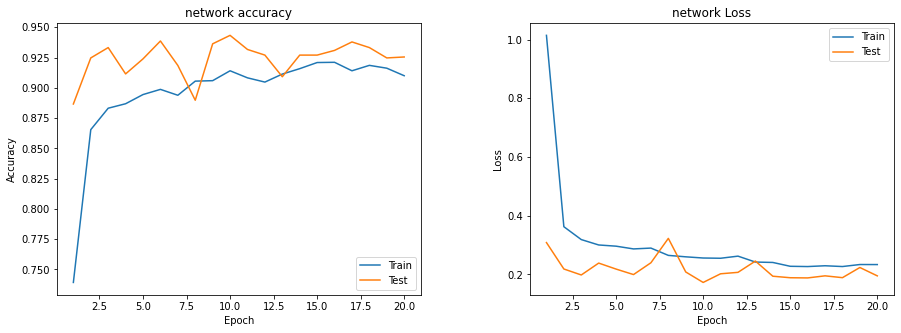

In [18]:
plotLossAccuracy(history)